## Import Libraries

In [1]:
! pip install seaborn
import matplotlib.cm as cm
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

Defaulting to user installation because normal site-packages is not writeable


In [2]:
df = pd.read_csv("US_Accidents_March23.csv")

In [3]:
df.head()

ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          False        False          Night   
1   False  False           False          False        False          Night   
2   False  False           False           True        False          Night   
3   False  False           False          False        False          Night   
4   False  False           False           True        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                   Day  
2          Night               Day                   Day  
3            Day               Day                   Day  
4            Day               Day                   Day  

[5 rows x 46 columns]

In [4]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [6]:
def simple_sanity_check(df):
    print('-' * 70)
    print(f'No. of Rows: {df.shape[0]}        No. of Columns: {df.shape[1]}')
    print('-' * 70)
    
    data_profile = pd.DataFrame({
        'DataType': df.dtypes,
        'Missing Values': df.isnull().sum(),
        'Missing %': (df.isnull().mean() * 100).round(2),
        'Unique Values': df.nunique()
    })
    
    print(data_profile)
    print('-' * 70)

# Call the function with your DataFrame 'df'
simple_sanity_check(df)

----------------------------------------------------------------------
No. of Rows: 7728394        No. of Columns: 46
----------------------------------------------------------------------
                      DataType  Missing Values  Missing %  Unique Values
ID                      object               0       0.00        7728394
Source                  object               0       0.00              3
Severity                 int64               0       0.00              4
Start_Time              object               0       0.00        6131796
End_Time                object               0       0.00        6705355
Start_Lat              float64               0       0.00        2428358
Start_Lng              float64               0       0.00        2482533
End_Lat                float64         3402762      44.03        1568172
End_Lng                float64         3402762      44.03        1605789
Distance(mi)           float64               0       0.00          22382
Descript

In [7]:
# create a dataframe of Street and their corresponding accident cases
street_df = pd.DataFrame(df['Street'].value_counts()).reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'})

top_ten_streets_df = pd.DataFrame(street_df.head(10))

In [8]:
top_ten_streets_df

Street No.  Cases
0     I-95 N  78430
1     I-95 S  74528
2      I-5 N  71968
3     I-10 E  55572
4     I-10 W  53725
5      I-5 S  51781
6     I-80 W  39662
7     I-80 E  36113
8    I-405 N  32364
9     I-75 N  28166

## EDA 1
Top 10 Accident Prone Streets in US (2016 - March 2023)EDA 1
Top 10 Accident Prone Streets in US (2016 - March 2023)

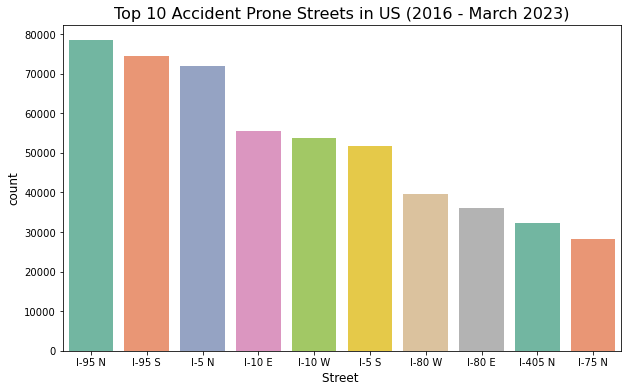

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Street No.', y='Cases', data=top_ten_streets_df, palette='Set2')

plt.title('Top 10 Accident Prone Streets in US (2016 - March 2023)', fontsize=16)
plt.xlabel('Street ', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()
plt.savefig('top_10_streets.png')

## Step 1
Columns_drop

In [12]:
columns_to_drop = ['ID', 'Country', 'Source', 'End_Lat', 'End_Lng', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight','Street']
df = df.drop(columns=columns_to_drop, axis=1)

## Step 2
Fill null values of city with mode (within state

In [13]:
# Calculate the mode (most frequent city) for each 'State' group
mode_cities = df.groupby('State')['City'].transform(lambda x: x.mode()[0])

# Fill missing 'City' values with the mode for their respective 'State' group
df['City'].fillna(mode_cities, inplace=True)

## step 3
Mean fill na

In [14]:
# Replace missing values with the mean of their respective states
columns_to_fill = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)', 'Precipitation(in)']

for column in columns_to_fill:
    df[column] = df[column].fillna(df.groupby('State')[column].transform('mean'))

## Step 4
Checking for duplicate

In [15]:
print("Num of duplicates", df.duplicated().sum())
df = df.drop_duplicates()

Num of duplicates 102358


## Step 5
Handling Near Duplicates

In [16]:
print("No. of Weather Conditions:", len(df["Weather_Condition"].unique()))

# To view the complete list of 142 weather descriptions, run the following code
print("\nList of unique weather conditions:", list(df["Weather_Condition"].unique()))


No. of Weather Conditions: 145

List of unique weather conditions: ['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow', 'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow', 'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog', 'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan, 'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog', 'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain', 'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand', 'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy', 'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy', 'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm', 'Light Rain Shower', 'Light Rain with Thunder', 'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm', 'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm', 'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow', 'Light Thunderstorms and Snow', 'Heavy Snow', 'Low Drifting Snow', '

In [17]:
import numpy as np

In [18]:
df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

## Step 6
Drop null values

In [19]:
columns_to_check = ['Description','Visibility(mi)', 'Wind_Direction','Weather_Condition','Timezone','Sunrise_Sunset']
df.dropna(subset=columns_to_check, inplace=True)

## Step 7
One hot encoding

In [20]:
df = df.replace([True, False], [1, 0])


In [21]:
simple_sanity_check(df)


----------------------------------------------------------------------
No. of Rows: 7374621        No. of Columns: 37
----------------------------------------------------------------------
                  DataType  Missing Values  Missing %  Unique Values
Severity             int64               0        0.0              4
Start_Time          object               0        0.0        5957376
End_Time            object               0        0.0        6506291
Start_Lat          float64               0        0.0        2359092
Start_Lng          float64               0        0.0        2408799
Distance(mi)       float64               0        0.0          21832
Description         object               0        0.0        3651621
City                object               0        0.0          12244
County              object               0        0.0           1813
State               object               0        0.0             49
Zipcode             object               0        0.

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7374621 entries, 0 to 7728393
Data columns (total 37 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Time         object 
 2   End_Time           object 
 3   Start_Lat          float64
 4   Start_Lng          float64
 5   Distance(mi)       float64
 6   Description        object 
 7   City               object 
 8   County             object 
 9   State              object 
 10  Zipcode            object 
 11  Timezone           object 
 12  Airport_Code       object 
 13  Weather_Timestamp  object 
 14  Temperature(F)     float64
 15  Wind_Chill(F)      float64
 16  Humidity(%)        float64
 17  Pressure(in)       float64
 18  Visibility(mi)     float64
 19  Wind_Direction     object 
 20  Wind_Speed(mph)    float64
 21  Precipitation(in)  float64
 22  Weather_Condition  object 
 23  Amenity            int64  
 24  Bump               int64  
 25  Crossing          

In [23]:
random_sample = df.sample(n=10000)


In [24]:
random_sample.columns


Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'City', 'County', 'State', 'Zipcode',
       'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')

## EDA 2, 3, 4
EDA(2) -> Severity vs. Wind Speed

EDA(3) -> Severity vs. Precipitation

EDA(4) -> Severity vs. Visibility

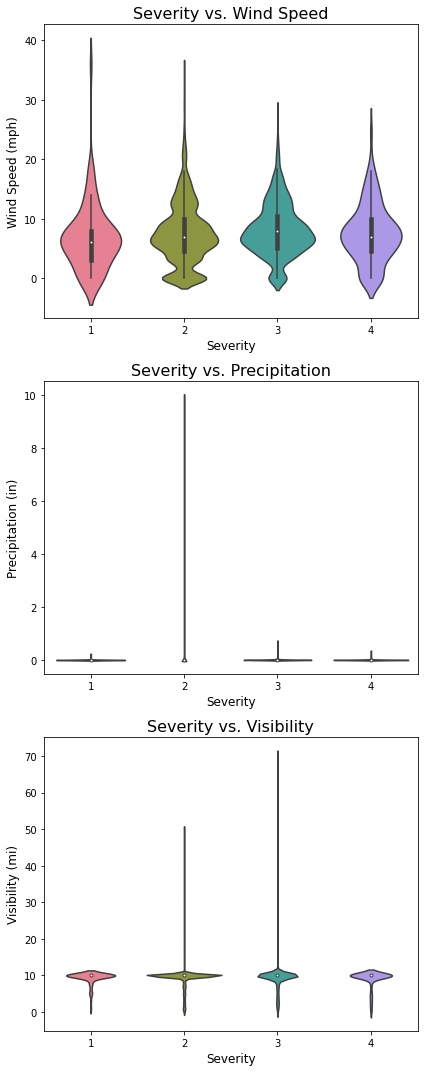

In [25]:
# Change Severity to Category
random_sample['Severity'] = random_sample['Severity'].astype('category')

# Create a set of axes and a figure
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 15))

# Violin plot for Wind Speed
sns.violinplot(data=random_sample, x='Severity', y='Wind_Speed(mph)', ax=axes[0], palette="husl")
axes[0].set_title('Severity vs. Wind Speed', fontsize=16)
axes[0].set_ylabel('Wind Speed (mph)', fontsize=12)
axes[0].set_xlabel('Severity', fontsize=12)

# Violin plot for Precipitation
sns.violinplot(data=random_sample, x='Severity', y='Precipitation(in)', ax=axes[1], palette="husl")
axes[1].set_title('Severity vs. Precipitation', fontsize=16)
axes[1].set_ylabel('Precipitation (in)', fontsize=12)
axes[1].set_xlabel('Severity', fontsize=12)

# Violin plot for Visibility
sns.violinplot(data=random_sample, x='Severity', y='Visibility(mi)', ax=axes[2], palette="husl")
axes[2].set_title('Severity vs. Visibility', fontsize=16)
axes[2].set_ylabel('Visibility (mi)', fontsize=12)
axes[2].set_xlabel('Severity', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

# Change Severity back to int if needed
random_sample['Severity'] = random_sample['Severity'].astype(int)

In [26]:
# Count the number of cases for each state
state_counts = random_sample["State"].value_counts().reset_index()

# Rename the columns to 'state_code' and 'cases'
state_counts.rename(columns={'index': 'state_code', 'State': 'cases'}, inplace=True)

# Sort the DataFrame by case counts in descending order
state_counts = state_counts.sort_values('cases', ascending=False)

## EDA 5
Top 10 States with Highest Number of Accidents

In [27]:
state_counts = df["State"].value_counts()


In [28]:
state_counts

CA    1665225
FL     846635
TX     564365
SC     369500
NY     333620
NC     327036
PA     281946
VA     278057
MN     181841
OR     170949
IL     165702
TN     164361
GA     162757
AZ     160266
MI     159816
LA     144398
NJ     130207
OH     115867
MD     109718
WA     105892
AL      97905
CO      87228
UT      86732
OK      82435
MO      72111
CT      68988
IN      64589
MA      58658
WI      34108
KY      31517
NE      28425
MT      26041
IA      24645
NV      20967
AR      20783
KS      17707
DC      17219
RI      16216
MS      14525
DE      13623
WV      12865
NM       9998
NH       9985
ID       9787
WY       3005
ND       2672
ME       2635
VT        887
SD        207
Name: State, dtype: int64

In [34]:
# Convert the Series to a DataFrame
state_counts_df = state_counts.reset_index()

# Rename the columns for clarity
state_counts_df.columns = ['State', 'Count']

# Display the resulting DataFrame
print(state_counts_df)

   State    Count
0     CA  1665225
1     FL   846635
2     TX   564365
3     SC   369500
4     NY   333620
5     NC   327036
6     PA   281946
7     VA   278057
8     MN   181841
9     OR   170949
10    IL   165702
11    TN   164361
12    GA   162757
13    AZ   160266
14    MI   159816
15    LA   144398
16    NJ   130207
17    OH   115867
18    MD   109718
19    WA   105892
20    AL    97905
21    CO    87228
22    UT    86732
23    OK    82435
24    MO    72111
25    CT    68988
26    IN    64589
27    MA    58658
28    WI    34108
29    KY    31517
30    NE    28425
31    MT    26041
32    IA    24645
33    NV    20967
34    AR    20783
35    KS    17707
36    DC    17219
37    RI    16216
38    MS    14525
39    DE    13623
40    WV    12865
41    NM     9998
42    NH     9985
43    ID     9787
44    WY     3005
45    ND     2672
46    ME     2635
47    VT      887
48    SD      207


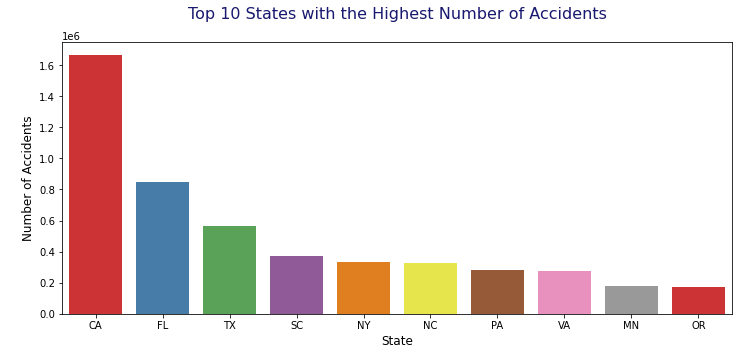

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming state_counts_df is already created as discussed earlier

# Sort by 'Count' to get the top 10 states
top_10 = state_counts_df.sort_values(by='Count', ascending=False).head(10)

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x=top_10['State'], y=top_10['Count'], palette='Set1', ax=ax)

# Add the title and labels
plt.title("Top 10 States with the Highest Number of Accidents\n", fontdict={'fontsize': 16, 'color': 'MidnightBlue'})
plt.ylabel("\nNumber of Accidents", fontdict={'fontsize': 12, 'color': 'black'})
plt.xlabel("State", fontdict={'fontsize': 12, 'color': 'black'})

# Save the plot
plt.savefig("Top 10 states with the highest number of accidents.png")

# Show the plot
plt.show()


## EDA - 6
10 States with Lowest Number of Accidents

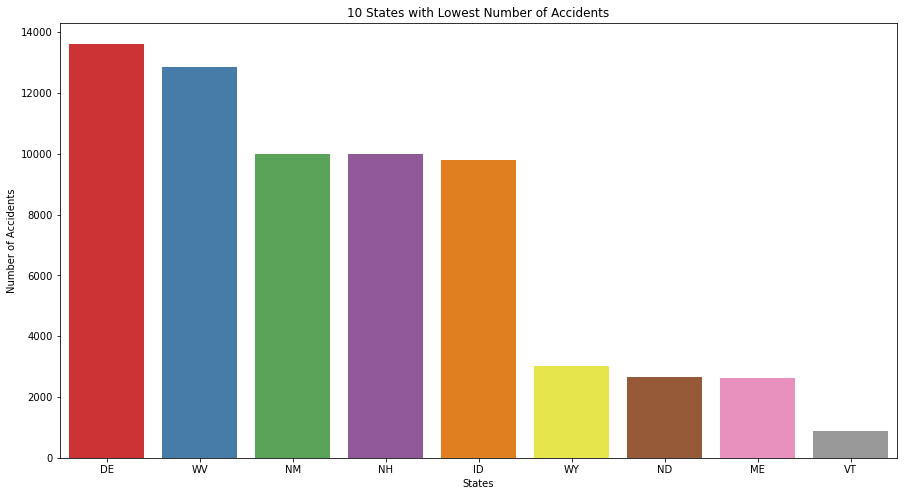

In [36]:
## Observing which states have most accidents
fig,axs = plt.subplots(figsize = (15,8))

x = state_counts[-10:-1].index.to_list()
y = state_counts[-10:-1].values.flatten()

sns.barplot(x=x, y = y, palette='Set1')
axs.tick_params(axis = 'x')
axs.set_ylabel("Number of Accidents")
axs.set_xlabel("States")
plt.title("10 States with Lowest Number of Accidents")
plt.savefig("10 States with Lowest Number of Accidents.png")
plt.show()


## EDA 7
Top 10 Cities with Highest Number of Accidents


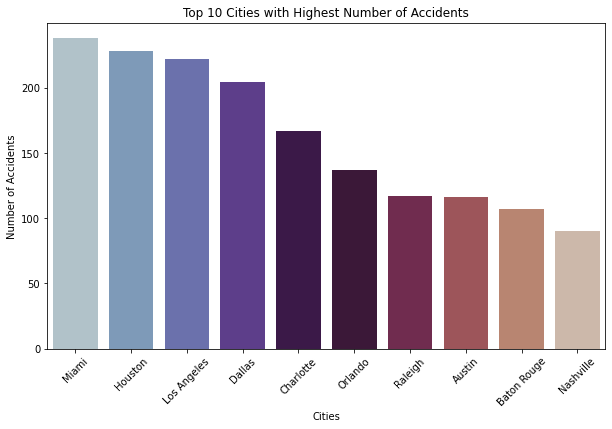

In [37]:
city_acc_counts = pd.DataFrame(random_sample['City'].value_counts()).reset_index()
city_acc_counts.columns = ['City', "Number of Accidents"]
city_acc_counts.sort_values(by='Number of Accidents', ascending=False, inplace=True)
x = city_acc_counts['City'][:10].to_list()
y = city_acc_counts["Number of Accidents"][:10]

# Observing Top 20 cities with the most accidents
fig, axs = plt.subplots(figsize=(10, 6))
sns.barplot(x=x, y=y, ax=axs, palette='twilight')
axs.tick_params(axis='x', rotation=45)
axs.set_ylabel("Number of Accidents")
axs.set_xlabel("Cities")
plt.title("Top 10 Cities with Highest Number of Accidents")
plt.savefig("Top 10 Cities with Highest Number of Accidents.png")
plt.show()

## EDA - 8¶
Accidents by Various Road Features and Severity

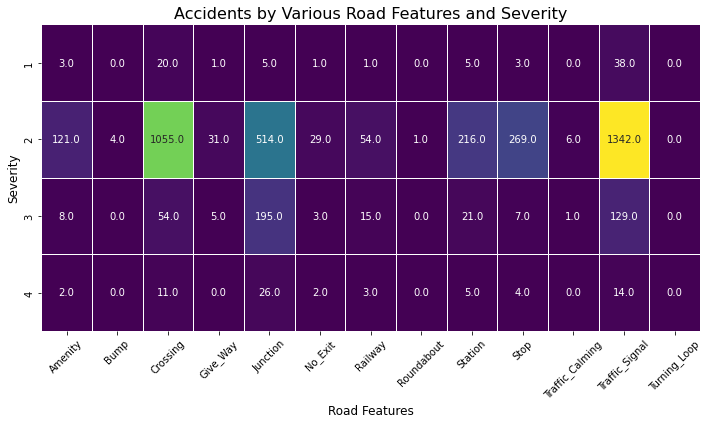

In [38]:
# Create a new dataset with boolean columns and severity
bool_severity_dataset = random_sample[['Severity', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
                                      'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
                                      'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']].copy()

# Calculate the number of accidents for each combination of severity and boolean columns
accidents_by_bool_severity = bool_severity_dataset.groupby(['Severity']).sum()

# Create a heatmap to visualize the relationship between accident severity and boolean columns
plt.figure(figsize=(10, 6))
sns.heatmap(data=accidents_by_bool_severity, cmap='viridis', annot=True, fmt='.1f', linewidths=.5, cbar=False)
plt.title('Accidents by Various Road Features and Severity', fontsize=16)
plt.xlabel('Road Features', fontsize=12)
plt.ylabel('Severity', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Accidents by Various Road Features and Severity.png")
plt.show()

## EDA - 9
Heatmap for Accidents on USA Map

In [39]:
! pip install folium 
import folium
from folium.plugins import HeatMap

# Create a folium map centered at a specific location
m = folium.Map(location=[random_sample['Start_Lat'].mean(), random_sample['Start_Lng'].mean()], zoom_start=4.4)

# Convert your data to a list of coordinates
heatmap_data = random_sample[['Start_Lat', 'Start_Lng']].values.tolist()

# Create a HeatMap layer and add it to the folium map
HeatMap(heatmap_data).add_to(m)

# Display the folium map
m

Defaulting to user installation because normal site-packages is not writeable


In [40]:
object_columns_df = df.select_dtypes(include=['object']).copy()
# column names to drop from 'df'
columns_to_drop = object_columns_df.columns

# Drop the selected columns from 'df'
df.drop(columns=columns_to_drop, inplace=True)


In [41]:
object_columns_df["Start_Time"].isna().sum()


0

## Step 8
Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder

state_encoder = LabelEncoder()
county_encoder = LabelEncoder()
city_encoder = LabelEncoder()
wind_direction_encoder = LabelEncoder()
weather_condition_encoder = LabelEncoder()
sunrise_sunset_encoder = LabelEncoder()

# Encode each column and add encoded columns to the DataFrame
object_columns_df["State_LabelEncoded"] = state_encoder.fit_transform(object_columns_df["State"])
object_columns_df["County_LabelEncoded"] = county_encoder.fit_transform(object_columns_df["County"])
object_columns_df["City_LabelEncoded"] = city_encoder.fit_transform(object_columns_df["City"])
object_columns_df["Wind_Direction_LabelEncoded"] = wind_direction_encoder.fit_transform(object_columns_df["Wind_Direction"])
object_columns_df["Weather_Condition_LabelEncoded"] = weather_condition_encoder.fit_transform(object_columns_df["Weather_Condition"])
object_columns_df["Sunrise_Sunset_LabelEncoded"] = sunrise_sunset_encoder.fit_transform(object_columns_df["Sunrise_Sunset"])

In [43]:
encoded_state_value = 5  # Replace with the label you want to inverse transform
original_state_category = wind_direction_encoder.inverse_transform([encoded_state_value])[0]
print(f"Encoded value {encoded_state_value} corresponds to State: {original_state_category}")

Encoded value 5 corresponds to State: East


In [44]:
#  I think we made a mistake rather than headlessly converting the timezone we should have converted them to UTC
object_columns_df.Timezone.unique()

array(['US/Eastern', 'US/Pacific', 'US/Central', 'US/Mountain'],
      dtype=object)

In [45]:
object_columns_df['Start_Time'].isna().sum()


0

## EDA - 10
Accidents by Hour of the Day

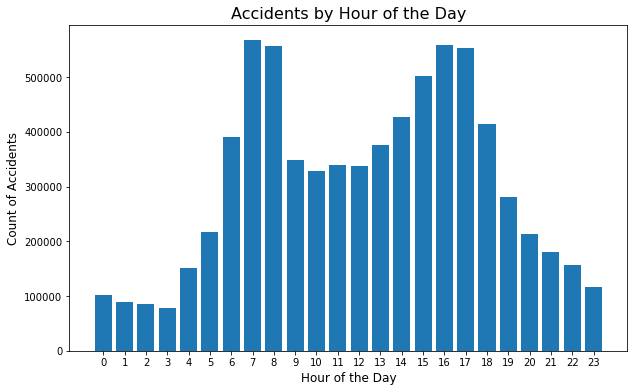

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Start_Time' to datetime format, coercing errors
object_columns_df['Start_Time'] = pd.to_datetime(object_columns_df['Start_Time'], errors='coerce')

# Create a DataFrame for hour-wise accident counts
hour_df = object_columns_df['Start_Time'].dt.hour.value_counts().reset_index()

# Rename columns for clarity
hour_df.columns = ['Hour', 'Count']

# Sort the DataFrame by the hour for proper ordering on the x-axis
hour_df = hour_df.sort_values(by='Hour')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(hour_df['Hour'], hour_df['Count'])
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Count of Accidents', fontsize=12)
plt.title('Accidents by Hour of the Day', fontsize=16)
plt.xticks(hour_df['Hour'])  # Ensure x-ticks match the hour values
plt.savefig("Accidents by Hour of the Day.png")
plt.show()


## Step 9
Feature Transformation changing timezones to UTC for consistency

In [47]:
# Convert "End_Time" to datetime objects with error handling
object_columns_df["End_Time"] = pd.to_datetime(object_columns_df["End_Time"], errors='coerce')

# Define a dictionary mapping timezones to UTC offsets (hours)
timezone_offsets = {
    'US/Eastern': -5,   # Eastern Time (ET) UTC offset
    'US/Pacific': -8,   # Pacific Time (PT) UTC offset
    'US/Central': -6,   # Central Time (CT) UTC offset
    'US/Mountain': -7,  # Mountain Time (MT) UTC offset
    # Add more timezone offsets as needed
}

# Use NumPy broadcasting to add the corresponding UTC offset to "End_Time"
object_columns_df["End_Time_UTC"] = object_columns_df["End_Time"] + pd.to_timedelta(object_columns_df["Timezone"].map(timezone_offsets), unit='h')

# Convert "Start_Time" to datetime objects
object_columns_df["Start_Time"] = pd.to_datetime(object_columns_df["Start_Time"], errors='coerce')

# Use NumPy broadcasting to add the corresponding UTC offset to "Start_Time"
object_columns_df["Start_Time_UTC"] = object_columns_df["Start_Time"] + pd.to_timedelta(object_columns_df["Timezone"].map(timezone_offsets), unit='h')

In [48]:
object_columns_df.columns


Index(['Start_Time', 'End_Time', 'Description', 'City', 'County', 'State',
       'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset',
       'State_LabelEncoded', 'County_LabelEncoded', 'City_LabelEncoded',
       'Wind_Direction_LabelEncoded', 'Weather_Condition_LabelEncoded',
       'Sunrise_Sunset_LabelEncoded', 'End_Time_UTC', 'Start_Time_UTC'],
      dtype='object')

In [49]:
object_columns_df.dropna(subset=["Timezone"], inplace=True)


## Step 10
Feature engineering

In [50]:
def extract_datetime_components(df, column_name):
    
    # Extract datetime components
    df[f'{column_name}_year'] = df[column_name].dt.year.astype(float)
    df[f'{column_name}_month'] = df[column_name].dt.month.astype(float)
    df[f'{column_name}_day'] = df[column_name].dt.day.astype(float)
    df[f'{column_name}_hour'] = df[column_name].dt.hour.astype(float)
    df[f'{column_name}_minute'] = df[column_name].dt.minute.astype(float)
    df[f'{column_name}_second'] = df[column_name].dt.second.astype(float)
    
    return df


In [51]:
object_columns_df = extract_datetime_components(object_columns_df, 'End_Time_UTC')
object_columns_df = extract_datetime_components(object_columns_df, 'Start_Time_UTC')

In [52]:
object_columns_df.columns


Index(['Start_Time', 'End_Time', 'Description', 'City', 'County', 'State',
       'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset',
       'State_LabelEncoded', 'County_LabelEncoded', 'City_LabelEncoded',
       'Wind_Direction_LabelEncoded', 'Weather_Condition_LabelEncoded',
       'Sunrise_Sunset_LabelEncoded', 'End_Time_UTC', 'Start_Time_UTC',
       'End_Time_UTC_year', 'End_Time_UTC_month', 'End_Time_UTC_day',
       'End_Time_UTC_hour', 'End_Time_UTC_minute', 'End_Time_UTC_second',
       'Start_Time_UTC_year', 'Start_Time_UTC_month', 'Start_Time_UTC_day',
       'Start_Time_UTC_hour', 'Start_Time_UTC_minute',
       'Start_Time_UTC_second'],
      dtype='object')

In [53]:
# year_df = pd.DataFrame(object_columns_df.Start_Time_UTC.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time_UTC':'Cases'}).sort_values(by='Cases', ascending=True)

In [54]:
import pandas as pd

# Create the DataFrame with year-wise accident counts
year_df = (
    object_columns_df.Start_Time_UTC.dt.year.value_counts()
    .reset_index()
    .rename(columns={'index': 'Year', 'Start_Time_UTC': 'Cases'})
    .sort_values(by='Cases', ascending=True)
)

# Calculate accidents per day (assuming 365 days in a year)
year_df['accident/day'] = year_df['Cases'] / 365

# Calculate accidents per hour (assuming 365 days and 24 hours in a day)
year_df['accident/hour'] = year_df['Cases'] / (365 * 24)

# Display the DataFrame
print(year_df)


   Year    Cases  accident/day  accident/hour
7  2023   233755    640.424658      26.684361
6  2016   399867   1095.526027      45.646918
5  2017   697108   1909.884932      79.578539
4  2018   867916   2377.852055      99.077169
3  2019   927848   2542.049315     105.918721
2  2020  1068419   2927.175342     121.965639
1  2021  1498211   4104.687671     171.028653
0  2022  1681497   4606.841096     191.951712


## EDA - 11, 12
EDA(11) -> Average Cases of Accident/hour in US (2016- March 2023) EDA(12) -> Average Cases of Accident/Day in US (2016- March 2023)



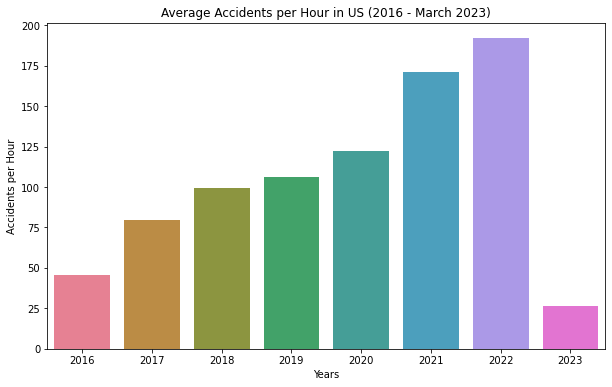

In [55]:
fig, ax2 = plt.subplots(figsize=(10, 6))
sns.barplot(x=year_df['Year'], y=year_df['accident/hour'], palette='husl')
plt.title("Average Accidents per Hour in US (2016 - March 2023)")
plt.xlabel("Years")
plt.ylabel("Accidents per Hour")
plt.savefig("Average Accidents per Hour in US (2016 - March 2023).png")
plt.show()


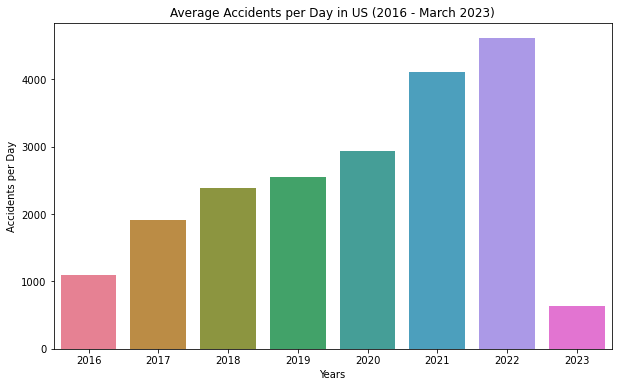

In [56]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x=year_df['Year'], y=year_df['accident/day'], palette='husl')
plt.title("Average Accidents per Day in US (2016 - March 2023)")
plt.xlabel("Years")
plt.ylabel("Accidents per Day")
plt.savefig("Average Accidents per Day in US (2016 - March 2023).png")
plt.show()

In [57]:
import pandas as pd
import calendar

# Create the DataFrame with month-wise accident counts
month_df = (
    object_columns_df.Start_Time_UTC.dt.month.value_counts()
    .reset_index()
    .rename(columns={'index': 'Month', 'Start_Time_UTC': 'Cases'})
)

# Map month numbers to month names
month_df['Month'] = month_df['Month'].apply(lambda x: calendar.month_name[x])

# Sort by month number if needed
month_df = month_df.sort_values(by='Month')

# Display the DataFrame
print(month_df)


        Month   Cases
7       April  565309
6      August  577864
0    December  797959
4    February  633229
1     January  718705
11       July  490680
8        June  544644
10      March  533914
9         May  537269
2    November  712770
3     October  641845
5   September  620433


## EDA - 13
Road Accident Percentage for different months in US (2016 - March 2023)

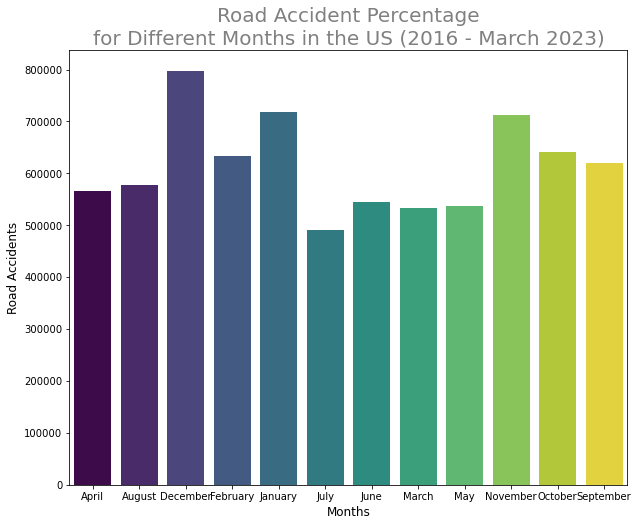

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors

fig, ax = plt.subplots(figsize=(10, 8))

# Use the 'viridis' colormap
cmap = cm.get_cmap('viridis', 12)
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

# Create the barplot with the 'viridis' palette
ax = sns.barplot(x=month_df['Month'], y=month_df['Cases'], palette=clrs)

# Set the title and labels
plt.title('Road Accident Percentage\nfor Different Months in the US (2016 - March 2023)', size=20, color='grey')
plt.xlabel('Months', fontsize=12)
plt.ylabel('Road Accidents', fontsize=12)

# Remove the incorrect x-axis limit
plt.savefig("Road Accident Percentage for different months in US (2016 - March 2023).png")
plt.show()


In [60]:
object_columns_df.drop(
    ['State', 'County','Start_Time', 'End_Time', 'Weather_Timestamp', 'Sunrise_Sunset', 
     'Weather_Condition', 'Wind_Direction', 'Timezone', 'Airport_Code', 'Description',
    'End_Time_UTC', 'Start_Time_UTC', 'City', 'Zipcode'], axis=1, inplace=True)

In [61]:
object_columns_df


State_LabelEncoded  County_LabelEncoded  City_LabelEncoded  \
0                        33                 1092               2612   
1                        33                  578               9142   
2                        33                  335              11951   
3                        33                 1092               2612   
4                        33                 1092               2612   
...                     ...                  ...                ...   
7728389                   3                 1365               9250   
7728390                   3                 1425               9652   
7728391                   3                 1197               8088   
7728392                   3                  944               2497   
7728393                   3                 1424               4806   

         Wind_Direction_LabelEncoded  Weather_Condition_LabelEncoded  \
0                                  1                               4   
1                                  1                               4   
2                                 16                               1   
3                                 16                               1   
4                                 16                               1   
...                              ...                             ...   
7728389                           20                               0   
7728390                           16                               0   
7728391                           15                               1   
7728392                           16                               0   
7728393                           16                               0   

         Sunrise_Sunset_LabelEncoded  End_Time_UTC_year  End_Time_UTC_month  \
0                                  1             2016.0                 2.0   
1                                  1             2016.0                 2.0   
2                                  1             2016.0                 2.0   
3                                  1             2016.0                 2.0   
4                                  0             2016.0                 2.0   
...                              ...                ...                 ...   
7728389                            0             2019.0                 8.0   
7728390                            0             2019.0                 8.0   
7728391                            0             2019.0                 8.0   
7728392                            0             2019.0                 8.0   
7728393                            0             2019.0                 8.0   

         End_Time_UTC_day  End_Time_UTC_hour  End_Time_UTC_minute  \
0                     8.0                6.0                  0.0   
1                     8.0                1.0                 37.0   
2                     8.0                2.0                 19.0   
3                     8.0                2.0                 53.0   
4                     8.0                3.0                  9.0   
...                   ...                ...                  ...   
7728389              23.0               10.0                 32.0   
7728390              23.0               11.0                 38.0   
7728391              23.0               11.0                 28.0   
7728392              23.0               11.0                 29.0   
7728393              23.0               11.0                 21.0   

         End_Time_UTC_second  Start_Time_UTC_year  Start_Time_UTC_month  \
0                        0.0               2016.0                   2.0   
1                       59.0               2016.0                   2.0   
2                       27.0               2016.0                   2.0   
3                       34.0               2016.0                   2.0   
4                        7.0               2016.0                   2.0   
...                      ...                  ...              

In [62]:
# check when you run next time if 
# timestamps_UTC are still there and remove them

In [63]:
df = pd.concat([object_columns_df, df], axis=1)

In [64]:
df.head()

State_LabelEncoded  County_LabelEncoded  City_LabelEncoded  \
0                  33                 1092               2612   
1                  33                  578               9142   
2                  33                  335              11951   
3                  33                 1092               2612   
4                  33                 1092               2612   

   Wind_Direction_LabelEncoded  Weather_Condition_LabelEncoded  \
0                            1                               4   
1                            1                               4   
2                           16                               1   
3                           16                               1   
4                           16                               1   

   Sunrise_Sunset_LabelEncoded  End_Time_UTC_year  End_Time_UTC_month  \
0                            1             2016.0                 2.0   
1                            1             2016.0                 2.0   
2                            1             2016.0                 2.0   
3                            1             2016.0                 2.0   
4                            0             2016.0                 2.0   

   End_Time_UTC_day  End_Time_UTC_hour  ...  Give_Way  Junction  No_Exit  \
0               8.0                6.0  ...         0         0        0   
1               8.0                1.0  ...         0         0        0   
2               8.0                2.0  ...         0         0        0   
3               8.0                2.0  ...         0         0        0   
4               8.0                3.0  ...         0         0        0   

   Railway  Roundabout  Station  Stop  Traffic_Calming  Traffic_Signal  \
0        0           0        0     0                0               0   
1        0           0        0     0                0               0   
2        0           0        0     0                0               1   
3        0           0        0     0                0               0   
4        0           0        0     0                0               1   

   Turning_Loop  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 42 columns]

## EDA - 14
Accidents by Severity per Year

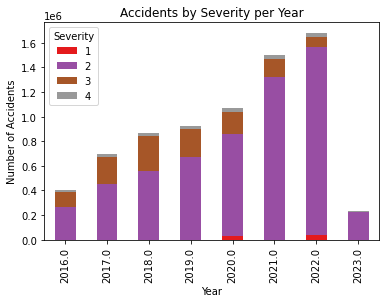

In [65]:
# Perform groupby operation
severity_grouped = df.groupby(['End_Time_UTC_year', 'Severity'])['Start_Lat'].count()

# Convert the result to a DataFrame
severity_df = severity_grouped.reset_index()

# Pivot the DataFrame
severity_pivot = severity_df.pivot(index='End_Time_UTC_year', columns='Severity', values='Start_Lat')

# Plot the stacked bar chart with a different colormap
ax = severity_pivot.plot.bar(stacked=True, colormap='Set1')

# Set the title and axis labels
plt.title("Accidents by Severity per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.savefig("Accidents by Severity per Year.png")
# Show the plot
plt.show()


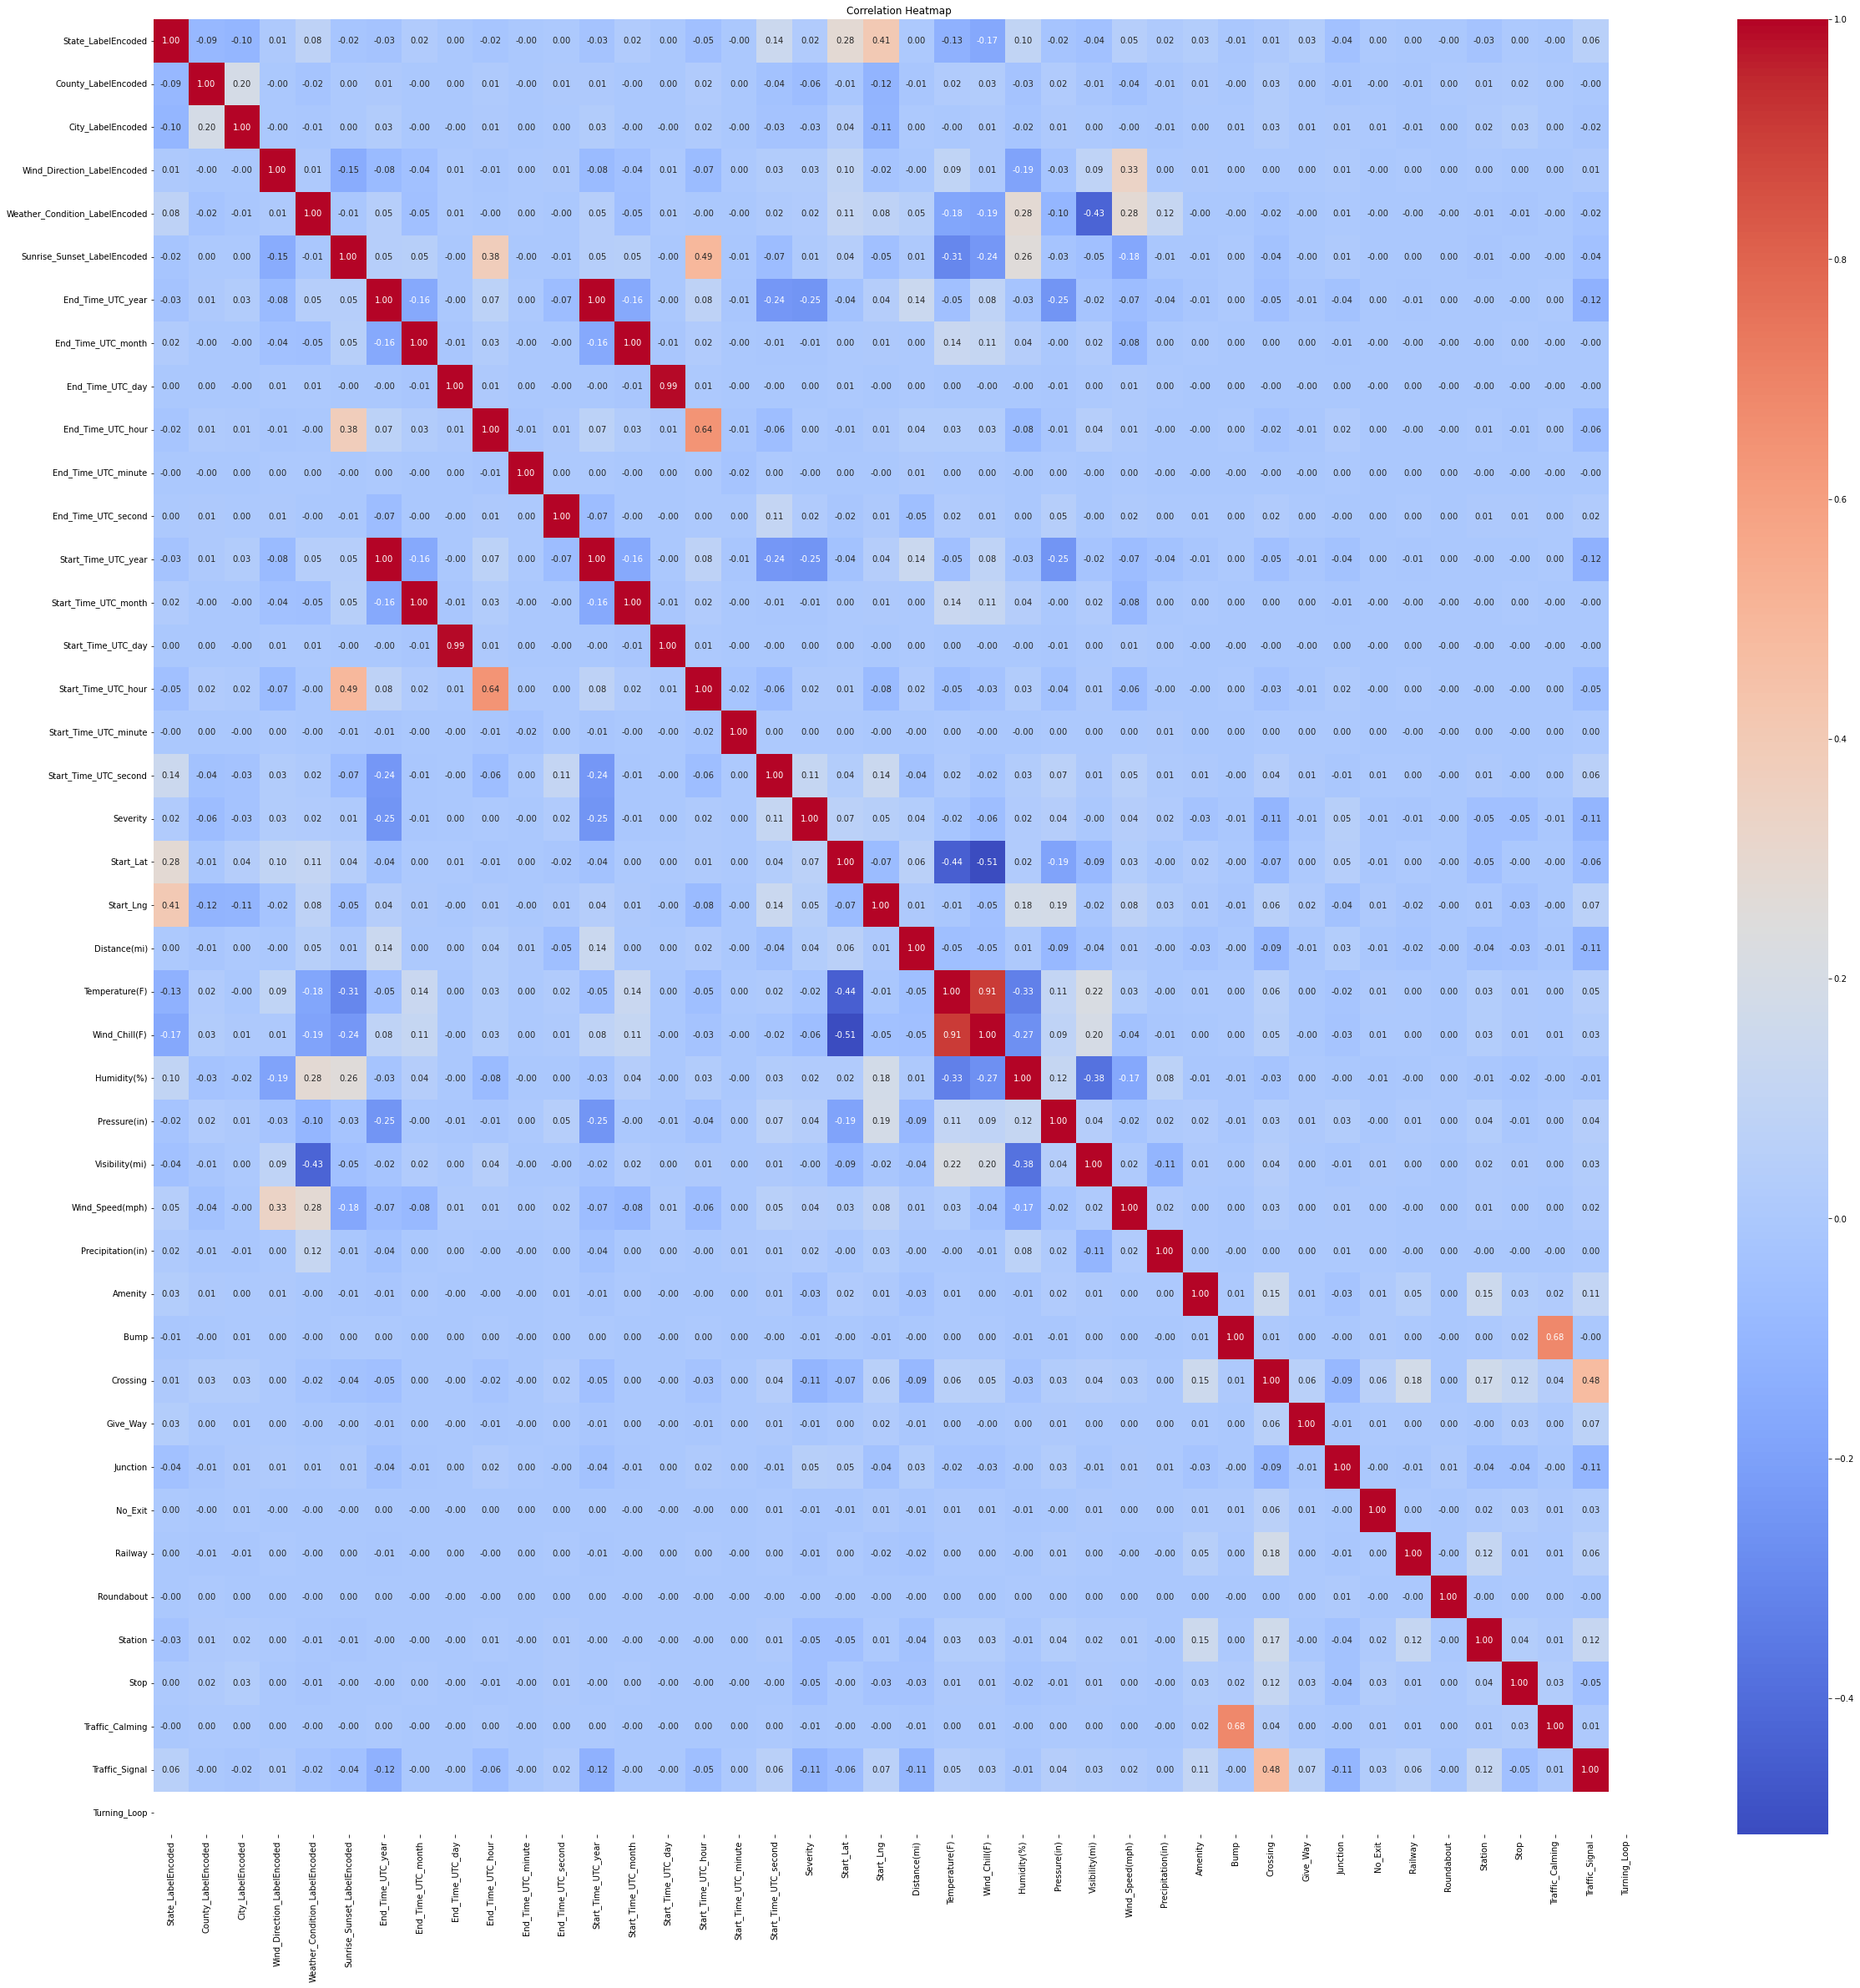

In [66]:
data = df  

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("Correlation Heatmap.png")
plt.show()

In [67]:
# Create a mask for upper triangular matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Fill the upper triangular matrix with True for highly correlated columns
highly_correlated = correlation_matrix.mask(mask).abs() > 0.80


# Find the columns to drop
columns_to_drop = [col for col in highly_correlated.columns if any(highly_correlated[col])]

# Print the columns that are being dropped
print("Columns to drop due to high correlation:", columns_to_drop)

# Drop the highly correlated columns from the DataFrame
data = data.drop(columns=columns_to_drop)

Columns to drop due to high correlation: ['End_Time_UTC_year', 'End_Time_UTC_month', 'End_Time_UTC_day', 'Temperature(F)']
